 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

### IMPORTANT 1: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!


### IMPORTANT 2: Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb . Notebooks without name will be discarded.

**Student name**: Luca Agosti<br>
**ID Number**: 2062889


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [181]:
IDnumber = 2062889
#IDnumber = 2022
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [182]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) #columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


We are going to classify class "1" (metal) vs class "-1" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [183]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.

dataSize = 200
testSize = 3/4

m_training = int(dataSize*testSize) # m_training needs to be the number of samples in the test set
m_test = int(dataSize*(1-testSize)) # m_test needs to be the number of samples in the test set

X_training = X[:m_training] # X_training = instances for training set
Y_training = Y[:m_training] #Y_training = labels for the training set
X_test = X[-m_test:] # X_test = instances for test set
Y_test = Y[-m_test:] # Y_test = labels for the test set

print(Y_training) # to make sure that Y_training contains both 1 and -1
print(m_test)

print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

[-1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1 -1  1  1  1 -1  1  1
 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1
 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1 -1 -1  1 -1  1 -1
 -1 -1  1 -1  1  1 -1  1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1
 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1 -1
  1  1 -1  1 -1  1]
50

Number of classical instances in test: 27
Number of metal instances in test: 23
Shape of training set: (150, 3)
Shape of test set: (50, 3)


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [184]:
# Add a 1 to each sample (homogeneous coordinates)
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

print("Training set in homogeneous coordinates:")
print(X_training[:10])

Training set in homogeneous coordinates:
[[   1.           99.38401442    0.21731991 2423.39287134]
 [   1.          129.19921875    0.19095671 1063.15330553]
 [   1.          107.66601562    0.52543069 3046.67149672]
 [   1.          161.49902344    0.49708615 2848.06867728]
 [   1.           99.38401442    0.27786523 1490.03481015]
 [   1.          143.5546875     0.26735339 1118.22750659]
 [   1.          172.265625      0.26048311 1340.27064282]
 [   1.          129.19921875    0.21632836 1211.29633521]
 [   1.           99.38401442    0.52438402 2980.15283418]
 [   1.           61.5234375     0.42997458 2389.38800173]]


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [185]:
def perceptron_update(current_w, x, y): # Update rule of the perceptron algorithm
    new_w = current_w + x*y 
    return new_w

def perceptron(X, Y, max_num_iterations): # Main section of the perceptron algorithm
    #init the algorith with w=0, use a best_w variable to keep track of the best solution
    permTest = np.random.permutation(len(X))
    curr_w = [0, 0, 0, 0]
    best_w = curr_w
    num_samples = 150
    best_error = num_samples
    index_misclassified = 0 #will be ovewritten
    num_misclassified = 0 #will be ovewritten
    num_iter = 1
    
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)): #main loop continue until all samples correctly classified or max # iterations reached
        index_misclassified = -1
        num_misclassified = 0
        X = X[permTest] #To avoid working always on the same sample I use a random permutation of the sample
        Y = Y[permTest] 
        
        for i in range(num_samples): #Check if the i-th randomly selected sample is misclassified
            if Y[i]*np.dot(curr_w, X[i]) <= 0: 
                curr_w = perceptron_update(curr_w, X[i], Y[i]) 
                
        for i in range(num_samples): #Store the number of randomly classified samples and the index of at least one of them
            if Y[i]*np.dot(curr_w, X[i]) <= 0:
                num_misclassified += 1
                index_misclassified = i
                
        if num_misclassified < best_error: #Store the best error and correspondent best w
            best_error = num_misclassified
            best_w = curr_w
            print("Num. misclass & Num. iter: ", num_misclassified, num_iter)
    
        num_iter += 1
        
    return best_w, best_error

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [186]:
w_found, error = perceptron(X_training,Y_training, 100) #Run the perceptron for 100 iterations
print("Training Error of perpceptron & fraction (100 iterations): " + str(error), "&", error/m_training )
print("Best w (100 iterations): ", w_found)

Num. misclass & Num. iter:  24 1
Num. misclass & Num. iter:  20 11
Num. misclass & Num. iter:  17 14
Num. misclass & Num. iter:  16 40
Training Error of perpceptron & fraction (100 iterations): 16 & 0.10666666666666667
Best w (100 iterations):  [  -479.         -40325.60264703     15.80907485   2516.66355198]


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [187]:
num_errors = 0

for i in range(m_test): #Using the w_found with 100 iterations to make predictions on the test dataset
            if Y_test[i]*np.dot(w_found, X_test[i]) <= 0:
                num_errors += 1

true_loss_estimate = num_errors/m_test  #Error rate on the test set
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))

Test Error of perpceptron (100 iterations): 0.12


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

We observe that the training error is 0.107 and that the test error is 0.120. The latter is bigger than the training error and this expected, but we also observe that they are very close to each other. In fact, trying with a different seed (seed: 2022) we get that the training error is 0.120 and test error is less, precisely is 0.080. This instability could be attribuited to the small size of the training sample and to the small number of iterations, which could induce a lot of variance in our results.

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [188]:
w_found, error = perceptron(X_training,Y_training, 4000) #Run the perceptron for 4000 iterations
print("Training Error of perpceptron & fraction (4000 iterations): " + str(error), "&", error/m_training )
print("Best w (4000 iterations): ", w_found)

num_errors = 0

for i in range(m_test): #Using the w_found with 4000 iterations to make predictions on the test dataset
            if Y_test[i]*np.dot(w_found, X_test[i]) <= 0:
                num_errors += 1

true_loss_estimate = num_errors/m_test  #Error rate on the test set
print("Test Error of perpceptron (4000 iterations): " + str(true_loss_estimate))

Num. misclass & Num. iter:  46 1
Num. misclass & Num. iter:  36 2
Num. misclass & Num. iter:  19 10
Num. misclass & Num. iter:  16 11
Training Error of perpceptron & fraction (4000 iterations): 16 & 0.10666666666666667
Best w (4000 iterations):  [  -185.         -19239.54896298     -1.92025603   1207.46601899]
Test Error of perpceptron (4000 iterations): 0.12


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

By increasing the maximum number if iteration we dont notice any difference in the training or test error (0.107 & 0.120), same as with 100 iterations. This means that in our case the extra iterations don't allow us to improve the parameters of the hyperplane w, and by that we mean that the new w cant classify correctly more points than the plane obtained with only 100 iterations. It's worth noting that the parameters of w did indeed change with 4000 iterations, but the quality of the new hyperplane is still not enough to improve the training or test error.

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [189]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceprton classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [190]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.

dataSize = 200
testSize = 3/4

m_training = int(dataSize*testSize) # m_test needs to be the number of samples in the test set
m_test = int(dataSize*(1-testSize)) # m_test needs to be the number of samples in the test set

X_training = X[:m_training] # X_training = instances for training set
Y_training = Y[:m_training] #Y_training = labels for the training set
X_test = X[-m_test:] # X_test = instances for test set
Y_test = Y[-m_test:] # Y_test = labels for the test set

print(Y_training) # to make sure that Y_training contains both 1 and -1
print(m_test)

print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

[ 1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1  1 -1  1  1 -1  1  1 -1  1
 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1
 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1  1  1  1
 -1  1  1  1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1  1  1 -1 -1
  1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1
  1  1 -1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1
 -1  1  1 -1 -1 -1]
50

Number of classical instances in test: 26
Number of metal instances in test: 24
Shape of training set: (150, 3)
Shape of test set: (50, 3)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [191]:
logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

logreg.fit(X_training, Y_training) #learn from training set
predictedLabelsTraining = logreg.predict(X_training) #predict on training set

error_training = 0

for i in range(m_training):#print the error rate = fraction of misclassified samples
    if predictedLabelsTraining[i] != Y_training[i]:
        error_training += 1

print("Error rate on training set: "+str(error_training/m_training))

predictedLabelsTest = logreg.predict(X_test) #predict on test set

error_test = 0

for i in range(m_test): #print the error rate = fraction of misclassified samples
    if predictedLabelsTest[i] != Y_test[i]:
        error_test += 1

print("Error rate on test set: "+str(error_test/m_test))

Error rate on training set: 0.0
Error rate on test set: 0.04


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [192]:
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']
index_feature1 = 0 # Select the best 2 features according to your experiments
index_feature2 = 1 # Select the best 2 features according to your experiments
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

#The label vector Y is the same as before, so no need to define Y_training and Y_test again
X_reduced_training = X_reduced[:m_training] # X_training = instances for training set
X_reduced_test = X_reduced[-m_test:] # X_test = instances for test set

Now learn a model using the training data and measure the performances.

In [193]:
logreg.fit(X_reduced_training, Y_training) #learn from training set
predictedLabelsTest = logreg.predict(X_reduced_test) #predict on training set

error_rate_test = 0

for i in range(m_test): #print the error rate = fraction of misclassified samples
    if predictedLabelsTest[i] != Y_test[i]:
        error_rate_test += 1

print("Error rate on test set: "+ str(error_rate_test/m_test))

Error rate on test set: 0.04


**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

The features that I selected are "tempo" and "chroma_stft" beacuse if one of them is "spectral_centroid" my pc cant handle its array of data and I get freezing problems for the notebook, the problem persists even if the parameter h in increased to h = 10. Also from the cell above we can see that the test error for this combination is 0.04, only a single record got misclassified. We also notice that the Linear Regression using all three features has a test error of 0.04, summing all up we can confidently say that the Linear Regression works better than the Perceptron algorithm on this type of data.

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

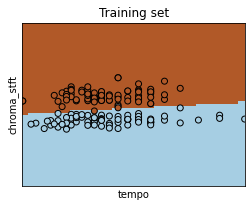

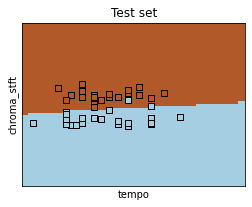

In [194]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = 0.02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [195]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [196]:
#Import Data: Load the data from a .csv file

filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

#A quick overview of data, to inspect the data you can use the method describe()

dataDescription = stats.describe(Data)
print(dataDescription)
print ("Shape of data array: " + str(Data.shape))


#for more interesting visualization: use Panda!

DescribeResult(nobs=500, minmax=(array([  0.00632,   0.     ,   0.46   ,   0.     ,   0.385  ,   3.561  ,
         2.9    ,   1.1296 ,   1.     , 187.     ,  12.6    ,   0.32   ,
         1.73   ,  50.     ]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([  3.65578576,  11.5       ,  11.13174   ,   0.07      ,
         0.5544514 ,   6.28297   ,  68.4246    ,   3.8119318 ,
         9.642     , 409.624     ,  18.4286    , 356.20804   ,
        12.69874   , 225.68      ]), variance=array([   74.72521949,   548.90581162,    47.61982282,     0.06523046,
           0.01358383,     0.49761833,   799.31416317,     4.46304043,
          75.96175952, 28560.51966333,     4.67663531,  8416.5713729 ,
          51.3361942 ,  8529.82925852]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0.40691344, -0.58266003,  0.99061328,  0.98

# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [197]:
#get number of total samples
num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)

m_t = int(num_total_samples*.7)

print ("Cardinality of Training Set: ", m_t)

np.random.shuffle(Data) #shuffle the data

#training data 
X_training = Data[:m_t, :-1] 
Y_training = Data[:m_t, -1]

print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)

#test data, to be used to estimate the true loss of the final model(s)
X_test = Data[m_t:, :-1] 
Y_test = Data[m_t:, -1] 

print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)

Total number of samples:  500
Cardinality of Training Set:  350
Training input data size:  (350, 13)
Training output data size:  (350,)
Test input data size:  (150, 13)
Test output data size:  (150,)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [198]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [ 0.  0.  0.  0. -0.  0. -0.  0.  0.  0.  0.  0. -0.]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the test input data: [-0.03028083 -0.08811694 -0.0396574  -0.08923508 -0.14278739 -0.03858365
 -0.08296291  0.06852084 -0.03817751 -0.06155791  0.06465506  0.02074829
 -0.09365855]
Std of the test input data: [0.99466664 0.91267688 1.01280239 0.84213711 0.87221719 1.10372155
 0.98053061 0.93628966 0.96144655 1.01591879 0.87354002 1.00272341
 0.97502149]


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [199]:
#compute linear regression coefficients for training data

#add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
m_training = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)),X_training)) # H: in homogeneous coordinates

m_test = X_test.shape[0]
X_testH = np.hstack((np.ones((m_test,1)),X_test))  # H: in homogeneous coordinates

# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr = np.linalg.lstsq(X_trainingH, Y_training, rcond=None)
print("LS coefficients with numpy lstsq:\n", w_np)

# compute Residual sums of squares 

RSStr_hand = np.sum((Y_training - np.dot(X_trainingH, w_np)) ** 2 )

print("RSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)

print("RSS by hand: ", RSStr_hand)
print("Empirical risk by hand:", RSStr_hand/m_training)

LS coefficients with numpy lstsq:
 [223.93142857  -8.29984603  11.79241521   7.13118988   2.92683476
 -24.32503905  25.2526325    2.99006127 -30.85983148  25.73620318
 -26.27811116 -21.34453012   6.22560932 -39.33059358]
RSS with numpy lstsq:  [777965.53972567]
Empirical risk with numpy lstsq: [2222.75868493]
RSS by hand:  777965.5397256694
Empirical risk by hand: 2222.758684930484


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [200]:
#Predictions on training and test sets
prediction_training = np.dot(X_trainingH, w_np)
prediction_test = np.dot(X_testH, w_np)

#Loss for points in the test data
RSS_test = np.sum((Y_test - np.dot(X_testH, w_np)) ** 2 )

print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

RSS on test data: 331672.18098687055
Loss estimated from test data: 2211.1478732458036


### QUESTION 4: Comment on the results you get and on the difference between the train and test errors.

We can see that the loss for the training ant test sample are quite similar (2222 vs 2211), even tough we expect the latter to be significantly bigger than the training loss. I ran the notebook with the random seed "2022" and in that case I got a training loss of 2422 and a test loss of 1749. This brings me to belive that having this much variability in the estimation of the loss for two sets could be a consequence of a great dependency of our model from the initial random permutation of data. This could be improved by increasing the size of the initial dataset.

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [201]:
from sklearn.linear_model import LinearRegression

# build the LinearRegression() model and train it
LinReg = LinearRegression().fit(X_training, Y_training)

print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:\n", LinReg.coef_)

# predict output values on training and test sets
prediction_training = np.dot(X_training, LinReg.coef_)+LinReg.intercept_
prediction_test = np.dot(X_test, LinReg.coef_)+LinReg.intercept_

# return a prediction score based on the coefficient of determination
print("Measure on training data:", 1-LinReg.score(X_training, Y_training))

Intercept: 223.93142857142865
Least-Squares Coefficients:
 [ -8.29984603  11.79241521   7.13118988   2.92683476 -24.32503905
  25.2526325    2.99006127 -30.85983148  25.73620318 -26.27811116
 -21.34453012   6.22560932 -39.33059358]
Measure on training data: 0.2617249743815211
